In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import nltk.sentiment
import re

from requests import get
from bs4 import BeautifulSoup
import os

import acquire
import prepare

In [2]:
#acquire.acquire_repo_list('petroleum')

In [3]:
#acquire.acquire_repo_list('solar energy')

In [4]:
#acquire.acquire_repo_list('natural gas')

In [5]:
#df = acquire.scrape_github_data()

In [6]:
df = pd.read_csv('all_repos_dict.csv')

In [7]:
df

,repo,language,readme_contents
0,ColasGael/Machine-Learning-for-Solar-Energy-Pr...,Python,# Machine-Learning-for-Solar-Energy-Prediction...
1,meltaxa/solariot,Python,# Solariot\n\nLeverage your IoT enabled Solar ...
2,renewables-ninja/gsee,Python,[![Master branch build status](https://img.shi...
3,3KUdelta/Solar_WiFi_Weather_Station,C++,# Zambretti Forecaster on Solar WiFi Weather S...
4,ropensci/nasapower,R,\n[![R build status](https://github.com/ropens...
...,...,...,...
295,agregoire/qc-drilling-timeline,JavaScript,No README
296,chrord/Data_driven_Distributed_Operation_of_El...,NaN,# Data-driven Distributed Operation of Electri...
297,chaiitanyasangani88/OperationalFlowRateVariation,MATLAB,# OperationalFlowCaseStudy\nA detailed study a...
298,jaburney/naturalgastransition,R,## Coal-to-Natural Gas Transition Impacts Anal...


In [8]:
df.loc[:100, 'category'] = 'solar_energy'

In [9]:
df.loc[100:200, 'category'] = 'petroleum'

In [10]:
df.loc[200:, 'category'] = 'natural_gas'

In [11]:
df = prepare.prep_repo_data(df)

In [12]:
df

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized
0,Python,solar_energy,ColasGael/Machine-Learning-for-Solar-Energy-Pr...,# Machine-Learning-for-Solar-Energy-Prediction...,"[machinelearningforsolarenergyprediction, by, ...",machinelearningforsolarenergypredict adel kuzm...,machinelearningforsolarenergyprediction adele ...
1,Python,solar_energy,meltaxa/solariot,# Solariot\n\nLeverage your IoT enabled Solar ...,"[solariot, leverage, your, iot, enabled, solar...",solariot leverag iot enabl solar pv invert str...,solariot leverage iot enabled solar pv inverte...
2,Python,solar_energy,renewables-ninja/gsee,[![Master branch build status](https://img.shi...,"[master, branch, build, statushttpsimgshieldsi...",master branch build statushttpsimgshieldsioazu...,master branch build statushttpsimgshieldsioazu...
3,C++,solar_energy,3KUdelta/Solar_WiFi_Weather_Station,# Zambretti Forecaster on Solar WiFi Weather S...,"[zambretti, forecaster, on, solar, wifi, weath...",zambretti forecast solar wifi weather station ...,zambretti forecaster solar wifi weather statio...
4,R,solar_energy,ropensci/nasapower,\n[![R build status](https://github.com/ropens...,"[r, build, statushttpsgithubcomropenscinasapow...",r build statushttpsgithubcomropenscinasapowerw...,r build statushttpsgithubcomropenscinasapowerw...
...,...,...,...,...,...,...,...
294,Python,natural_gas,fernandessfae/Evolucao-da-producao-de-gas-natu...,# Projeto DataScience - Evolução da produção d...,"[projeto, datascience, evoluo, da, produo, de,...",projeto datasci evoluo da produo de gs natur p...,projeto datascience evoluo da produo de g natu...
296,NaN,natural_gas,chrord/Data_driven_Distributed_Operation_of_El...,# Data-driven Distributed Operation of Electri...,"[datadriven, distributed, operation, of, elect...",datadriven distribut oper electr natur ga syst...,datadriven distributed operation electricity n...
297,MATLAB,natural_gas,chaiitanyasangani88/OperationalFlowRateVariation,# OperationalFlowCaseStudy\nA detailed study a...,"[operationalflowcasestudy, a, detailed, study,...",operationalflowcasestudi detail studi oper flo...,operationalflowcasestudy detailed study operat...
298,R,natural_gas,jaburney/naturalgastransition,## Coal-to-Natural Gas Transition Impacts Anal...,"[coaltonatural, gas, transition, impacts, anal...",coaltonatur ga transit impact analysi thi repo...,coaltonatural gas transition impact analysis r...


In [13]:
df.shape

(241, 7)

In [14]:
df.dropna(inplace=True)

In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
df

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized
0,Python,solar_energy,ColasGael/Machine-Learning-for-Solar-Energy-Pr...,# Machine-Learning-for-Solar-Energy-Prediction...,"[machinelearningforsolarenergyprediction, by, ...",machinelearningforsolarenergypredict adel kuzm...,machinelearningforsolarenergyprediction adele ...
1,Python,solar_energy,meltaxa/solariot,# Solariot\n\nLeverage your IoT enabled Solar ...,"[solariot, leverage, your, iot, enabled, solar...",solariot leverag iot enabl solar pv invert str...,solariot leverage iot enabled solar pv inverte...
2,Python,solar_energy,renewables-ninja/gsee,[![Master branch build status](https://img.shi...,"[master, branch, build, statushttpsimgshieldsi...",master branch build statushttpsimgshieldsioazu...,master branch build statushttpsimgshieldsioazu...
3,C++,solar_energy,3KUdelta/Solar_WiFi_Weather_Station,# Zambretti Forecaster on Solar WiFi Weather S...,"[zambretti, forecaster, on, solar, wifi, weath...",zambretti forecast solar wifi weather station ...,zambretti forecaster solar wifi weather statio...
4,R,solar_energy,ropensci/nasapower,\n[![R build status](https://github.com/ropens...,"[r, build, statushttpsgithubcomropenscinasapow...",r build statushttpsgithubcomropenscinasapowerw...,r build statushttpsgithubcomropenscinasapowerw...
...,...,...,...,...,...,...,...
209,C++,natural_gas,reyhancaba/Natural-Gas-Detector-Circuit-Using-...,# Natural-Gas-Detector-Circuit-Using-An-Arduin...,"[naturalgasdetectorcircuitusinganarduinouno, b...",naturalgasdetectorcircuitusinganarduinouno bu ...,naturalgasdetectorcircuitusinganarduinouno bu ...
210,Python,natural_gas,fernandessfae/Evolucao-da-producao-de-gas-natu...,# Projeto DataScience - Evolução da produção d...,"[projeto, datascience, evoluo, da, produo, de,...",projeto datasci evoluo da produo de gs natur p...,projeto datascience evoluo da produo de g natu...
211,MATLAB,natural_gas,chaiitanyasangani88/OperationalFlowRateVariation,# OperationalFlowCaseStudy\nA detailed study a...,"[operationalflowcasestudy, a, detailed, study,...",operationalflowcasestudi detail studi oper flo...,operationalflowcasestudy detailed study operat...
212,R,natural_gas,jaburney/naturalgastransition,## Coal-to-Natural Gas Transition Impacts Anal...,"[coaltonatural, gas, transition, impacts, anal...",coaltonatur ga transit impact analysi thi repo...,coaltonatural gas transition impact analysis r...


In [17]:
df[df.index==15]

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized
15,JavaScript,solar_energy,rprokap/pset-9,# pset-9\n CREDITS SEQUENCE ...,"[pset9, credits, sequence, newspaper, headline...",pset9 credit sequenc newspap headlin montag he...,pset9 credit sequence newspaper headline monta...


In [ ]:
df.clean_lemmatized.apply(len).nlargest(15)

In [18]:
df = df[df.index!=15]

In [ ]:
plt.figure(figsize=(16, 9))
pd.Series(df.clean_tokes).value_counts().head(12).plot.barh(width=.9, ec='black', title='12 most common words')
plt.xlabel('Number of occurances')

In [ ]:
df.repo[16]

In [ ]:
titan.to_csv('titan.csv')

In [ ]:
#ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text: str) -> list:
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

all_words = clean(' '.join(df.readme_contents))

plt.figure(figsize=(16, 9))
pd.Series(all_words).value_counts().head(12).plot.barh(width=.9, ec='black', title='12 most common words')
plt.xlabel('Number of occurances')

In [ ]:
df.clean_stemmed.str.len()

In [ ]:
df.info()

In [ ]:
df.describe()

In [22]:
df.language.value_counts()

Python               42
Jupyter Notebook     37
JavaScript           23
Java                 16
HTML                 14
C++                  13
CSS                  10
PHP                   8
R                     8
MATLAB                8
C                     7
Matlab                4
Vue                   3
Lasso                 3
C#                    2
Visual Basic          2
TSQL                  2
GAMS                  1
ActionScript          1
Processing            1
Julia                 1
TypeScript            1
Visual Basic .NET     1
Pascal                1
TeX                   1
FORTRAN               1
Arduino               1
Go                    1
Name: language, dtype: int64

In [ ]:
top_lang = list(df.language.value_counts().head(10).index)
top_lang

In [20]:
df['word_count'] = df.clean_lemmatized.str.split().apply(len)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


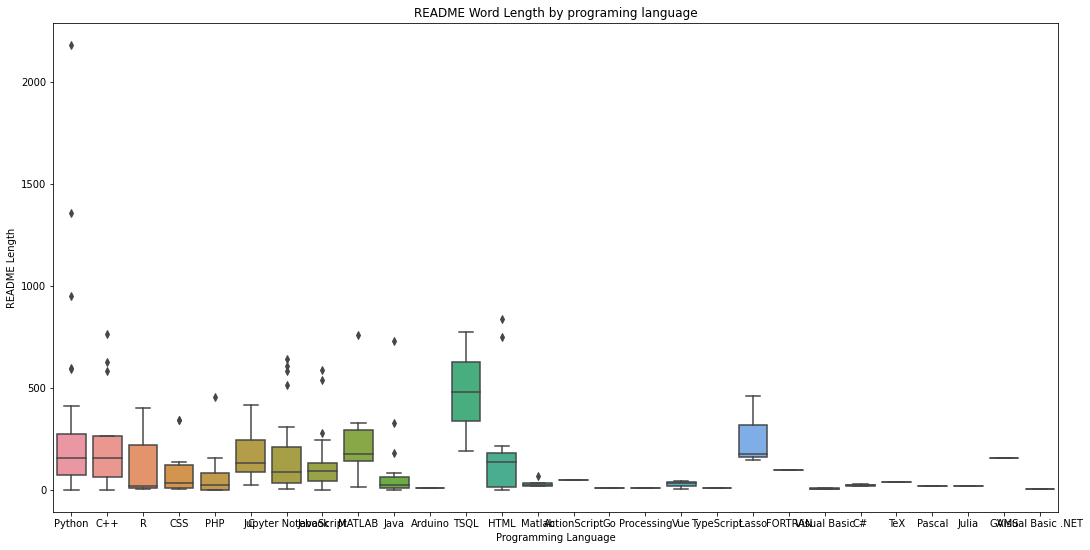

In [21]:
plt.figure(figsize=(18,9))
sns.boxplot(data=df, y=df.lan, x='language')
plt.title("README Word Length by programing language")
plt.xlabel('Programming Language')
plt.ylabel('README Length')
plt.show()

In [42]:
df[df.language == 'Vue' and df.language == 'Lasso' and df.language == 'C#' and df.language == 'Visual Basic' and df.language == 'TSQL' and df.language == 'GAMS' and df.language == 'ActionScript' and df.language == 'Processing' and  df.language == 'Julia' and df.language ==  'TypeScript' and df.language == 'Visual Basic .NET' and df.language == 'Pascal' and df.language == 'TeX' and df.language == 'FORTRAN' and df.language == 'Arduino' and df.language == 'Go']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [65]:
df['language'].replace(to_replace=['Matlab', 'MATLAB'], inplace=True)

In [66]:
df['language'].value_counts() < 7

Python               False
Jupyter Notebook     False
JavaScript           False
Java                 False
C++                  False
HTML                 False
CSS                  False
PHP                  False
R                    False
C                    False
Visual Basic          True
Vue                   True
Lasso                 True
C#                    True
TSQL                  True
Visual Basic .NET     True
GAMS                  True
Processing            True
ActionScript          True
Pascal                True
Julia                 True
TypeScript            True
TeX                   True
FORTRAN               True
Arduino               True
Go                    True
Name: language, dtype: bool

In [60]:
df.count(level='language')

TypeError: Can only count levels on hierarchical index.

In [67]:
low = df.language.value_counts() < 5

In [68]:
[low.index[i] for i, x in enumerate(low) if x]

['Visual Basic',
 'Vue',
 'Lasso',
 'C#',
 'TSQL',
 'Visual Basic .NET',
 'GAMS',
 'Processing',
 'ActionScript',
 'Pascal',
 'Julia',
 'TypeScript',
 'TeX',
 'FORTRAN',
 'Arduino',
 'Go']